## Setup datasets on Colab - only once

The following code must be executed only the first time that you open Colab; it is needed to unzip the dataset that we provided into your GDrive account so that you can access them in the future

NB: BEFORE running this notebook, you must copy the dataset zip at this [link](https://drive.google.com/file/d/1tQqEyt3go3vMh4fj_LZrRcahoTbzzH-y/view?usp=share_link) into your GDrive. You can use the link by simply clicking 'create a copy'. Make sure that you have enough space in GDrive (roughly 1 GB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/datasets
%ls

/content/drive/MyDrive/datasets
sf_xs/  sf_xs.zip


In [ ]:

# unzip the datasets to /content, so you don't risk going over the GDrive storage limit
# this can take a few minutes
!unzip -q sf_xs.zip -d /content

In [ ]:
# now remove the zips from your GDrive
#%rm sf_xs.zip
# and move the unzipped datasets into your GDrive; in this way the next time
# you open Colab you can directly access them
!mv /content/sf_xs /content/drive/MyDrive/datasets

## Setup environment - every time

Every time you restart Colab's kernel, you have to re-install packages and download anything that was not saved into your GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CosPlace

/content/drive/MyDrive/CosPlace


In [ ]:
!pip install utm faiss_cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 94.1 MB/s eta 0:00:00
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=a3978e1a1878db5eb8ba68dec43bf365e2d20a2f317f3fc825c30362e9980e70
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:
# sample experiment; with sf_xs you are limited to using --groups_num 1
!python train.py --dataset_folder /content/sf_xs --backbone ResNet18 --groups_num 1 --num_preds_to_save 3 --lr 5e-3 --epochs_num 10 --num_workers 4 --resume_model /content/drive/MyDrive/CosPlace/logs/default/2023-06-13_10-57-07/best_model.pth

2023-06-13 12:26:35   train.py --dataset_folder /content/sf_xs --backbone ResNet18 --groups_num 1 --num_preds_to_save 3 --lr 5e-3 --epochs_num 10 --num_workers 4 --resume_model /content/drive/MyDrive/CosPlace/logs/default/2023-06-13_10-57-07/best_model.pth
2023-06-13 12:26:35   Arguments: Namespace(M=10, alpha=30, N=5, L=2, groups_num=1, min_images_per_class=10, backbone='ResNet18', fc_output_dim=512, use_amp16=False, augmentation_device='cuda', batch_size=32, epochs_num=10, iterations_per_epoch=10000, lr=0.005, classifiers_lr=0.01, brightness=0.7, contrast=0.7, hue=0.5, saturation=0.7, random_resized_crop=0.5, infer_batch_size=16, positive_dist_threshold=25, resume_train=None, resume_model='/content/drive/MyDrive/CosPlace/logs/default/2023-06-13_10-57-07/best_model.pth', device='cuda', seed=0, num_workers=4, num_preds_to_save=3, save_only_wrong_preds=False, dataset_folder='/content/sf_xs', save_dir='default', train_set_folder='/content/sf_xs/train', val_set_folder='/content/sf_xs/val'

In [2]:
SGD_5e_3_R1 = [41.2,50.3,51.7,52.0,52.3]
SGD_5e_3_R5 = [56.4,64.1,65.3,65.2,65.7]

SGD_1e_3_R1 = [40.8,50.9,54.2,55.6,56.4]
SGD_1e_3_R5 = [57.1,65.9,68.3,69.6,70.1]

SGD_5e_4_R1 = [37.1,48.8,52.3,54.6,55.6]
SGD_5e_4_R5 = [53.7,64.1,66.9,68.6,69.1]

SGD_1e_4_R1 = [24.0,35.9,43.0,46.9,49.1]
SGD_1e_4_R5 = [38.9,53.5,59.5,62.4,63.9]

SGD_1e_5_R1 = [16.2,18.5,21.3,23.9,26.6]
SGD_1e_5_R5 = [27.9,31.6,35.0,38.7,42.1]

x = [0,1,2,3,4]

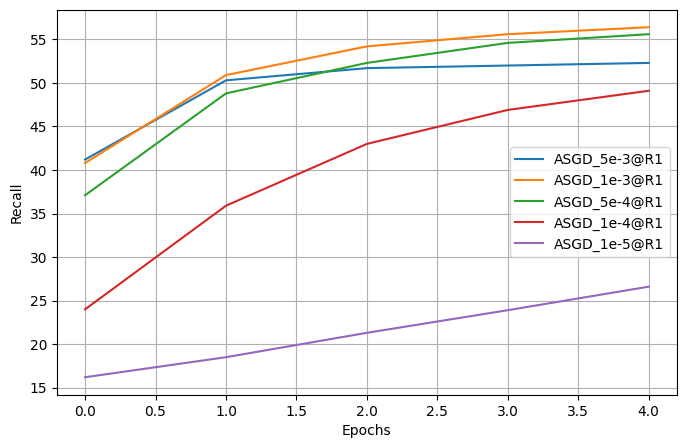

In [3]:
# 0. Import matplotlib and get it ready
%matplotlib inline
import matplotlib.pyplot as plt



# 2. Setup plot
fig, ax = plt.subplots(figsize=(8,5)) # width & height

# 3. Plot the data
line1 = ax.plot(x,SGD_5e_3_R1, label = 'ASGD_5e-3@R1')
line2 = ax.plot(x,SGD_1e_3_R1,label = 'ASGD_1e-3@R1')
line3 = ax.plot(x,SGD_5e_4_R1,label = 'ASGD_5e-4@R1')
line4 = ax.plot(x,SGD_1e_4_R1,label = 'ASGD_1e-4@R1')
line5 = ax.plot(x,SGD_1e_5_R1,label = 'ASGD_1e-5@R1')
ax.legend()
# 4. Customize Plot
ax.set(
        xlabel="Epochs",
        ylabel="Recall")

ax.grid()
# 5. Display
plt.show()

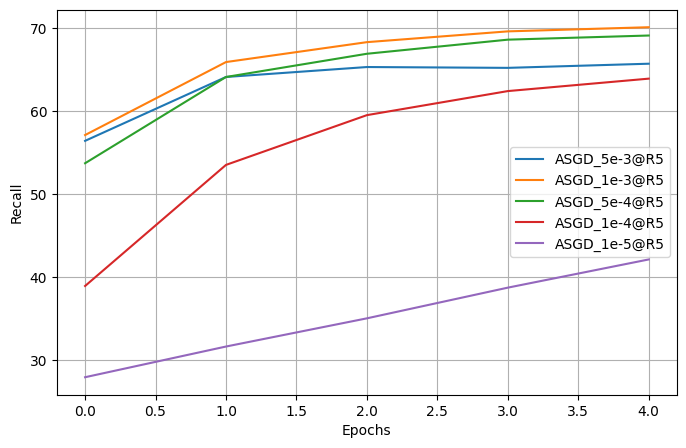

In [4]:
# 0. Import matplotlib and get it ready
%matplotlib inline
import matplotlib.pyplot as plt



# 2. Setup plot
fig, ax = plt.subplots(figsize=(8,5)) # width & height

# 3. Plot the data
line1 = ax.plot(x,SGD_5e_3_R5, label = 'ASGD_5e-3@R5')
line2 = ax.plot(x,SGD_1e_3_R5,label = 'ASGD_1e-3@R5')
line3 = ax.plot(x,SGD_5e_4_R5,label = 'ASGD_5e-4@R5')
line4 = ax.plot(x,SGD_1e_4_R5,label = 'ASGD_1e-4@R5')
line5 = ax.plot(x,SGD_1e_5_R5,label = 'ASGD_1e-5@R5')
ax.legend()
# 4. Customize Plot
ax.set(
        xlabel="Epochs",
        ylabel="Recall")

ax.grid()
# 5. Display
plt.show()